In [1]:
import math
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
path = "finviz.csv"

def get_column_from_csv(file, col_name):
    try:
        df = pd.read_csv(file)
    except FileNotFoundError:
        print("File Doesn't Exist")
    else:
        return df[col_name]


tickers = get_column_from_csv(path, "Ticker")
tickers = tickers.tolist()
print(len(tickers))


3157


In [ ]:
#download data and save Close price
anchorData = yf.download(tickers)
anchorData.head()
closingPrices = anchorData["Close"]


In [ ]:
# display data
closingPrices.tail()

In [ ]:
# Save data to csv to avoid downloading again
closingPrices.to_csv("AllClosingPricesToday.csv")

In [ ]:
# Read from csv (i reccomend always writing and reading in once becuase the formatting is weird sometimes and can affect pandas*)
closingPrices = pd.read_csv("AllClosingPricesToday.csv")
closingPrices.tail()

In [ ]:
#Get all prices from between a start and end date
def getSearchRange(start, end):
    return closingPrices[closingPrices['Date'].between(start, end)]



In [ ]:
# Try out get search range
test = getSearchRange('2022-12-01 00:00:00-05:00', '2022-12-31 00:00:00-05:00')
test.tail()

In [ ]:
validTickers = {}
invalidTickers = []
# get min price of each ticker from certain dates
searchRange = getSearchRange("2022-01-01 00:00:00-05:00", "2022-12-31 00:00:00-05:00")
for ticker in tickers:
    
    if ticker not in searchRange:
        invalidTickers.append(ticker)
        continue
    lowest = min(searchRange[ticker])

    if math.isnan(lowest):
        invalidTickers.append(ticker)
    else:
        validTickers[ticker] = round(lowest, 2)


todaysTickers = list(validTickers.keys())
todaysTickers.sort()


In [14]:
validTickers = {}
invalidTickers = []
# get max price of each ticker from certain dates
searchRange = getSearchRange("2022-10-14 00:00:00-05:00", "2022-12-16 00:00:00-05:00")
for ticker in tickers:
    
    if ticker not in searchRange:
        invalidTickers.append(ticker)
        continue
    lowest = max(searchRange[ticker])

    if math.isnan(lowest):
        invalidTickers.append(ticker)
    else:
        validTickers[ticker] = round(lowest, 2)


todaysTickers = list(validTickers.keys())
todaysTickers.sort()

In [ ]:
print(len(todaysTickers))
print(invalidTickers, len(invalidTickers))

In [ ]:
print(validTickers)

In [ ]:
# Use current this code box just for todays data. (optional)
currentClosing = closingPrices.iloc[-1]
currentClosing

In [ ]:
#count the number of NaN values in each column
currentClosing.isnull().sum()

In [ ]:
# set target range to just todays data (optional)
targetRange = currentClosing
targetRange

In [ ]:
# count the number of current closing prices greater/less than the minimum from validtickers for a given date. Check if the price is nan first.
def counter(date):
    count = 0.0
    searchFor = []
    antiSearch = []
    total = len(todaysTickers)
    for ticker in todaysTickers:
        if math.isnan(date[ticker]):
            total -=1
        elif date[ticker] > validTickers[ticker]:
            count += 1
            searchFor.append(ticker)
        else:
            antiSearch.append(ticker)

    percent = round(count/total, 4)
    return [percent, searchFor]

In [15]:
# date range to create graph on
targetRange = getSearchRange("2022-12-16 00:00:00-05:00", "2023-02-15 00:00:00-05:00")
targetRange.shape[0]

41

In [ ]:
targetRange.tail()

In [16]:
percents = []
for i in range(targetRange.shape[0]):
    percents.append(counter(targetRange.iloc[i])[0])
print(percents, len(percents))

[0.0146, 0.0159, 0.0276, 0.0489, 0.047, 0.0616, 0.0733, 0.0552, 0.0819, 0.0831, 0.0828, 0.1251, 0.1092, 0.1695, 0.1661, 0.1997, 0.248, 0.2862, 0.303, 0.2955, 0.2584, 0.2346, 0.2912, 0.3338, 0.331, 0.3416, 0.3726, 0.389, 0.3471, 0.4231, 0.4711, 0.528, 0.5018, 0.457, 0.4784, 0.4422, 0.3896, 0.3953, 0.437, 0.4261, 0.4423] 41


In [ ]:
# for 1 day
ret= counter(currentClosing)
print(ret[1])

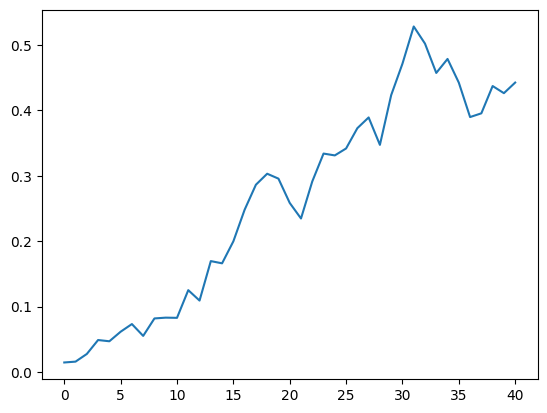

In [17]:
# Plot data

ys = percents
xs = range(len(ys))
plt.plot(xs, ys)
plt.show()
plt.close()

In [ ]:
print(searchFor, len(searchFor))

In [ ]:
print(antiSearch, len(antiSearch))

In [ ]:
df = pd.DataFrame(ret[1], columns=['ticker'])
df.to_csv("output.csv", index=False)